In [1]:
%load_ext autoreload
%autoreload 2

import os
from jax import config
config.update("jax_enable_x64", True)

os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID" 
os.environ["CUDA_VISIBLE_DEVICES"] = '2'
from encoding_information.gpu_utils import limit_gpu_memory_growth
limit_gpu_memory_growth()

from cleanplots import *
import jax.numpy as np
from jax.scipy.special import logsumexp
import numpy as onp
from encoding_information.image_utils import *
from encoding_information.information_estimation import *


2023-11-30 19:49:14.693728: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-30 19:49:15.205702: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/hpinkard_waller/mambaforge/envs/phenotypes/lib/python3.10/site-packages/nvidia/cublas/lib:/home/hpinkard_waller/mambaforge/envs/phenotypes/lib/python3.10/site-packages/nvidia/cuda_cupti/lib:/home/hpinkard_waller/mambaforge/envs/phenotypes/lib/python3.10/site-packages/nvidia/cuda_nvcc/lib:/home/hpinkard_waller/mambaforge/envs/phenotypes/lib/python3.10/site-packages/nvidia/cuda_nvrtc/lib:/home/hpinkard_waller/mambaforge/envs/phenotypes/lib/python3.10/site-packages/nvidia/cuda_runtime/lib:/home/hpinkard_waller/mambaforge/envs/phenotypes/lib/pyth

In [2]:
initial_patches = np.load('/home/emarkley/Workspace/PYTHON/InformationTheoryEndToEnd/MIMeasurements/DimSingleBeadWithBground_xlr0.005_ylr0.005_rlr0.005_unetlr0.0001/mi_measurements_0.npy')
final_patches = np.load('/home/emarkley/Workspace/PYTHON/InformationTheoryEndToEnd/MIMeasurements/DimSingleBeadWithBground_xlr0.005_ylr0.005_rlr0.005_unetlr0.0001/mi_measurements_10.npy')

intial_noisy_patches = add_noise(initial_patches)
final_noisy_patches = add_noise(final_patches)

In [3]:
mi_pixelcnn_initial, pixel_cnn_initial = estimate_mutual_information(intial_noisy_patches, entropy_model='pixelcnn', max_epochs=50, verbose=True, return_entropy_model=True)
mi_pixelcnn_final, pixel_cnn_final = estimate_mutual_information(final_noisy_patches, entropy_model='pixelcnn', max_epochs=50, verbose=True, return_entropy_model=True)

2023-11-30 19:49:30.154682: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:42] Overriding orig_value setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.


Initial validation NLL: 55.42


Epoch 1: 100%|██████████| 100/100 [00:19<00:00,  5.08it/s]


Epoch 1: validation NLL: 4.93


Epoch 2: 100%|██████████| 100/100 [00:09<00:00, 10.50it/s]


Epoch 2: validation NLL: 4.72


Epoch 3: 100%|██████████| 100/100 [00:09<00:00, 10.73it/s]


Epoch 3: validation NLL: 4.70


Epoch 4: 100%|██████████| 100/100 [00:09<00:00, 10.32it/s]


Epoch 4: validation NLL: 4.71


Epoch 5: 100%|██████████| 100/100 [00:09<00:00, 10.39it/s]


Epoch 5: validation NLL: 4.69


Epoch 6: 100%|██████████| 100/100 [00:09<00:00, 10.69it/s]


Epoch 6: validation NLL: 4.70


Epoch 7: 100%|██████████| 100/100 [00:09<00:00, 10.59it/s]


Epoch 7: validation NLL: 4.71


Epoch 8: 100%|██████████| 100/100 [00:09<00:00, 10.24it/s]


Epoch 8: validation NLL: 4.70


Epoch 9: 100%|██████████| 100/100 [00:09<00:00, 10.37it/s]


Epoch 9: validation NLL: 4.69


Epoch 10: 100%|██████████| 100/100 [00:09<00:00, 10.55it/s]


Epoch 10: validation NLL: 4.69


Epoch 11: 100%|██████████| 100/100 [00:09<00:00, 10.59it/s]


Epoch 11: validation NLL: 4.69


Epoch 12: 100%|██████████| 100/100 [00:09<00:00, 10.69it/s]


Epoch 12: validation NLL: 4.69


Epoch 13: 100%|██████████| 100/100 [00:09<00:00, 10.46it/s]


Epoch 13: validation NLL: 4.69


Epoch 14: 100%|██████████| 100/100 [00:09<00:00, 10.51it/s]


Epoch 14: validation NLL: 4.69


Epoch 15: 100%|██████████| 100/100 [00:09<00:00, 10.32it/s]


Epoch 15: validation NLL: 4.69


Epoch 16: 100%|██████████| 100/100 [00:09<00:00, 10.57it/s]


Epoch 16: validation NLL: 4.69


Epoch 17: 100%|██████████| 100/100 [00:09<00:00, 10.42it/s]


Epoch 17: validation NLL: 4.69


Epoch 18: 100%|██████████| 100/100 [00:09<00:00, 10.19it/s]


Epoch 18: validation NLL: 4.70


Epoch 19: 100%|██████████| 100/100 [00:09<00:00, 10.67it/s]


Epoch 19: validation NLL: 4.68


Epoch 20: 100%|██████████| 100/100 [00:09<00:00, 10.60it/s]


Epoch 20: validation NLL: 4.77


Epoch 21: 100%|██████████| 100/100 [00:09<00:00, 10.60it/s]


Epoch 21: validation NLL: 4.69


Epoch 22: 100%|██████████| 100/100 [00:09<00:00, 10.47it/s]


Epoch 22: validation NLL: 4.68


Epoch 23: 100%|██████████| 100/100 [00:09<00:00, 10.41it/s]


Epoch 23: validation NLL: 4.68


Epoch 24: 100%|██████████| 100/100 [00:09<00:00, 10.43it/s]


Epoch 24: validation NLL: 4.68


Epoch 25: 100%|██████████| 100/100 [00:09<00:00, 10.41it/s]


Epoch 25: validation NLL: 4.69


Epoch 26: 100%|██████████| 100/100 [00:09<00:00, 10.63it/s]


Epoch 26: validation NLL: 4.68


Epoch 27: 100%|██████████| 100/100 [00:09<00:00, 10.58it/s]


Epoch 27: validation NLL: 4.68


Epoch 28: 100%|██████████| 100/100 [00:09<00:00, 10.19it/s]


Epoch 28: validation NLL: 4.67


Epoch 29: 100%|██████████| 100/100 [00:09<00:00, 10.59it/s]


Epoch 29: validation NLL: 4.67


Epoch 30: 100%|██████████| 100/100 [00:09<00:00, 10.26it/s]


Epoch 30: validation NLL: 4.67


Epoch 31: 100%|██████████| 100/100 [00:09<00:00, 10.51it/s]


Epoch 31: validation NLL: 4.68


Epoch 32: 100%|██████████| 100/100 [00:09<00:00, 10.52it/s]


Epoch 32: validation NLL: 4.67


Epoch 33: 100%|██████████| 100/100 [00:09<00:00, 10.38it/s]


Epoch 33: validation NLL: 4.67


Epoch 34: 100%|██████████| 100/100 [00:09<00:00, 10.29it/s]


Epoch 34: validation NLL: 4.67


Epoch 35: 100%|██████████| 100/100 [00:09<00:00, 10.69it/s]


Epoch 35: validation NLL: 4.69


Epoch 36: 100%|██████████| 100/100 [00:09<00:00, 10.53it/s]


Epoch 36: validation NLL: 4.66


Epoch 37: 100%|██████████| 100/100 [00:09<00:00, 10.59it/s]


Epoch 37: validation NLL: 4.67


Epoch 38: 100%|██████████| 100/100 [00:09<00:00, 10.37it/s]


Epoch 38: validation NLL: 4.66


Epoch 39: 100%|██████████| 100/100 [00:09<00:00, 10.40it/s]


Epoch 39: validation NLL: 4.66


Epoch 40: 100%|██████████| 100/100 [00:09<00:00, 10.51it/s]


Epoch 40: validation NLL: 4.66


Epoch 41: 100%|██████████| 100/100 [00:09<00:00, 10.42it/s]


Epoch 41: validation NLL: 4.66


Epoch 42: 100%|██████████| 100/100 [00:09<00:00, 10.34it/s]


Epoch 42: validation NLL: 4.65


Epoch 43: 100%|██████████| 100/100 [00:09<00:00, 10.25it/s]


Epoch 43: validation NLL: 4.65


Epoch 44: 100%|██████████| 100/100 [00:09<00:00, 10.38it/s]


Epoch 44: validation NLL: 4.66


Epoch 45: 100%|██████████| 100/100 [00:09<00:00, 10.37it/s]


Epoch 45: validation NLL: 4.65


Epoch 46: 100%|██████████| 100/100 [00:09<00:00, 10.53it/s]


Epoch 46: validation NLL: 4.66


Epoch 47: 100%|██████████| 100/100 [00:09<00:00, 10.46it/s]


Epoch 47: validation NLL: 4.66


Epoch 48: 100%|██████████| 100/100 [00:09<00:00, 10.54it/s]


Epoch 48: validation NLL: 4.64


Epoch 49: 100%|██████████| 100/100 [00:09<00:00, 10.67it/s]


Epoch 49: validation NLL: 4.65


Epoch 50: 100%|██████████| 100/100 [00:09<00:00, 10.73it/s]


Epoch 50: validation NLL: 4.64
Estimated H(Y|X) = 4.308 differential entropy/pixel
Estimated H(Y) (Upper bound) = 4.644 differential entropy/pixel
Estimated I(Y;X) = 0.485 bits/pixel
Initial validation NLL: 164.55


Epoch 1: 100%|██████████| 100/100 [00:13<00:00,  7.50it/s]


Epoch 1: validation NLL: 5.02


Epoch 2: 100%|██████████| 100/100 [00:10<00:00,  9.93it/s]


Epoch 2: validation NLL: 4.89


Epoch 3: 100%|██████████| 100/100 [00:09<00:00, 10.62it/s]


Epoch 3: validation NLL: 4.87


Epoch 4: 100%|██████████| 100/100 [00:09<00:00, 10.57it/s]


Epoch 4: validation NLL: 4.84


Epoch 5: 100%|██████████| 100/100 [00:09<00:00, 10.53it/s]


Epoch 5: validation NLL: 4.84


Epoch 6: 100%|██████████| 100/100 [00:09<00:00, 10.26it/s]


Epoch 6: validation NLL: 4.83


Epoch 7: 100%|██████████| 100/100 [00:09<00:00, 10.55it/s]


Epoch 7: validation NLL: 4.83


Epoch 8: 100%|██████████| 100/100 [00:09<00:00, 10.24it/s]


Epoch 8: validation NLL: 4.83


Epoch 9: 100%|██████████| 100/100 [00:09<00:00, 10.24it/s]


Epoch 9: validation NLL: 4.82


Epoch 10: 100%|██████████| 100/100 [00:09<00:00, 10.14it/s]


Epoch 10: validation NLL: 4.82


Epoch 11: 100%|██████████| 100/100 [00:09<00:00, 10.58it/s]


Epoch 11: validation NLL: 4.81


Epoch 12: 100%|██████████| 100/100 [00:09<00:00, 10.46it/s]


Epoch 12: validation NLL: 4.82


Epoch 13: 100%|██████████| 100/100 [00:09<00:00, 10.42it/s]


Epoch 13: validation NLL: 4.81


Epoch 14: 100%|██████████| 100/100 [00:09<00:00, 10.59it/s]


Epoch 14: validation NLL: 4.80


Epoch 15: 100%|██████████| 100/100 [00:09<00:00, 10.45it/s]


Epoch 15: validation NLL: 4.80


Epoch 16: 100%|██████████| 100/100 [00:09<00:00, 10.47it/s]


Epoch 16: validation NLL: 4.81


Epoch 17: 100%|██████████| 100/100 [00:09<00:00, 10.26it/s]


Epoch 17: validation NLL: 4.79


Epoch 18: 100%|██████████| 100/100 [00:09<00:00, 10.09it/s]


Epoch 18: validation NLL: 4.80


Epoch 19: 100%|██████████| 100/100 [00:09<00:00, 10.40it/s]


Epoch 19: validation NLL: 4.79


Epoch 20: 100%|██████████| 100/100 [00:09<00:00, 10.35it/s]


Epoch 20: validation NLL: 4.79


Epoch 21: 100%|██████████| 100/100 [00:09<00:00, 10.33it/s]


Epoch 21: validation NLL: 4.79


Epoch 22: 100%|██████████| 100/100 [00:09<00:00, 10.30it/s]


Epoch 22: validation NLL: 4.78


Epoch 23: 100%|██████████| 100/100 [00:09<00:00, 10.39it/s]


Epoch 23: validation NLL: 4.79


Epoch 24: 100%|██████████| 100/100 [00:09<00:00, 10.51it/s]


Epoch 24: validation NLL: 4.78


Epoch 25: 100%|██████████| 100/100 [00:09<00:00, 10.23it/s]


Epoch 25: validation NLL: 4.78


Epoch 26: 100%|██████████| 100/100 [00:09<00:00, 10.22it/s]


Epoch 26: validation NLL: 4.78


Epoch 27: 100%|██████████| 100/100 [00:09<00:00, 10.43it/s]


Epoch 27: validation NLL: 4.78


Epoch 28: 100%|██████████| 100/100 [00:09<00:00, 10.24it/s]


Epoch 28: validation NLL: 4.78


Epoch 29: 100%|██████████| 100/100 [00:09<00:00, 10.46it/s]


Epoch 29: validation NLL: 4.77


Epoch 30: 100%|██████████| 100/100 [00:09<00:00, 10.17it/s]


Epoch 30: validation NLL: 4.77


Epoch 31: 100%|██████████| 100/100 [00:09<00:00, 10.16it/s]


Epoch 31: validation NLL: 4.77


Epoch 32: 100%|██████████| 100/100 [00:09<00:00, 10.24it/s]


Epoch 32: validation NLL: 4.76


Epoch 33: 100%|██████████| 100/100 [00:09<00:00, 10.27it/s]


Epoch 33: validation NLL: 4.77


Epoch 34: 100%|██████████| 100/100 [00:10<00:00,  9.93it/s]


Epoch 34: validation NLL: 4.77


Epoch 35: 100%|██████████| 100/100 [00:09<00:00, 10.20it/s]


Epoch 35: validation NLL: 4.76


Epoch 36: 100%|██████████| 100/100 [00:09<00:00, 10.07it/s]


Epoch 36: validation NLL: 4.76


Epoch 37: 100%|██████████| 100/100 [00:09<00:00, 10.19it/s]


Epoch 37: validation NLL: 4.76


Epoch 38: 100%|██████████| 100/100 [00:09<00:00, 10.15it/s]


Epoch 38: validation NLL: 4.76


Epoch 39: 100%|██████████| 100/100 [00:09<00:00, 10.31it/s]


Epoch 39: validation NLL: 4.76


Epoch 40: 100%|██████████| 100/100 [00:09<00:00, 10.37it/s]


Epoch 40: validation NLL: 4.76


Epoch 41: 100%|██████████| 100/100 [00:09<00:00, 10.24it/s]


Epoch 41: validation NLL: 4.76


Epoch 42: 100%|██████████| 100/100 [00:09<00:00, 10.11it/s]


Epoch 42: validation NLL: 4.76


Epoch 43: 100%|██████████| 100/100 [00:09<00:00, 10.10it/s]


Epoch 43: validation NLL: 4.78


Epoch 44: 100%|██████████| 100/100 [00:09<00:00, 10.26it/s]


Epoch 44: validation NLL: 4.75


Epoch 45: 100%|██████████| 100/100 [00:09<00:00, 10.05it/s]


Epoch 45: validation NLL: 4.75


Epoch 46: 100%|██████████| 100/100 [00:09<00:00, 10.29it/s]


Epoch 46: validation NLL: 4.77


Epoch 47: 100%|██████████| 100/100 [00:09<00:00, 10.21it/s]


Epoch 47: validation NLL: 4.75


Epoch 48: 100%|██████████| 100/100 [00:09<00:00, 10.00it/s]


Epoch 48: validation NLL: 4.75


Epoch 49: 100%|██████████| 100/100 [00:10<00:00,  9.91it/s]


Epoch 49: validation NLL: 4.75


Epoch 50: 100%|██████████| 100/100 [00:09<00:00, 10.30it/s]


Epoch 50: validation NLL: 4.75
Estimated H(Y|X) = 4.436 differential entropy/pixel
Estimated H(Y) (Upper bound) = 4.751 differential entropy/pixel
Estimated I(Y;X) = 0.454 bits/pixel


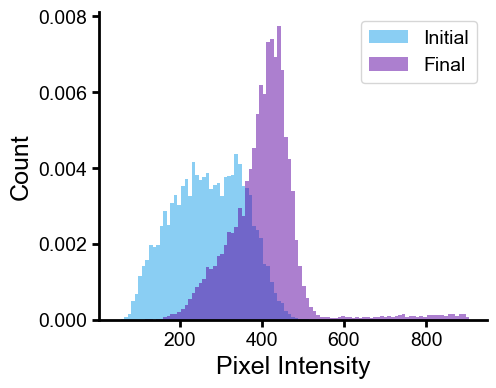

In [13]:
# plot histogram of initial noisy patches
fig, ax = plt.subplots(1, 1, figsize=(5,4))
bins = np.linspace(min(intial_noisy_patches.min(), final_noisy_patches.min()),
                        max(np.percentile(final_noisy_patches, 99.5), np.percentile(initial_patches, 99.5)), 100)


ax.hist(intial_noisy_patches[:25].flatten(),  alpha=0.5, label='Initial', bins=bins, density=True)
ax.hist(final_noisy_patches[:25].flatten(),  alpha=0.5, label='Final', bins=bins, density=True)
ax.set_xlabel('Pixel Intensity')
ax.set_ylabel('Count')
ax.legend()
clear_spines(ax)

In [17]:
# draw samples from the initial and final pixelcnn models
samples_initial = pixel_cnn_initial.generate_samples(10)
samples_final = pixel_cnn_final.generate_samples(10)


Generating PixelCNN samples: 100%|██████████| 30/30 [06:51<00:00, 13.70s/it]


Text(-0.5, 0.5, 'Final')

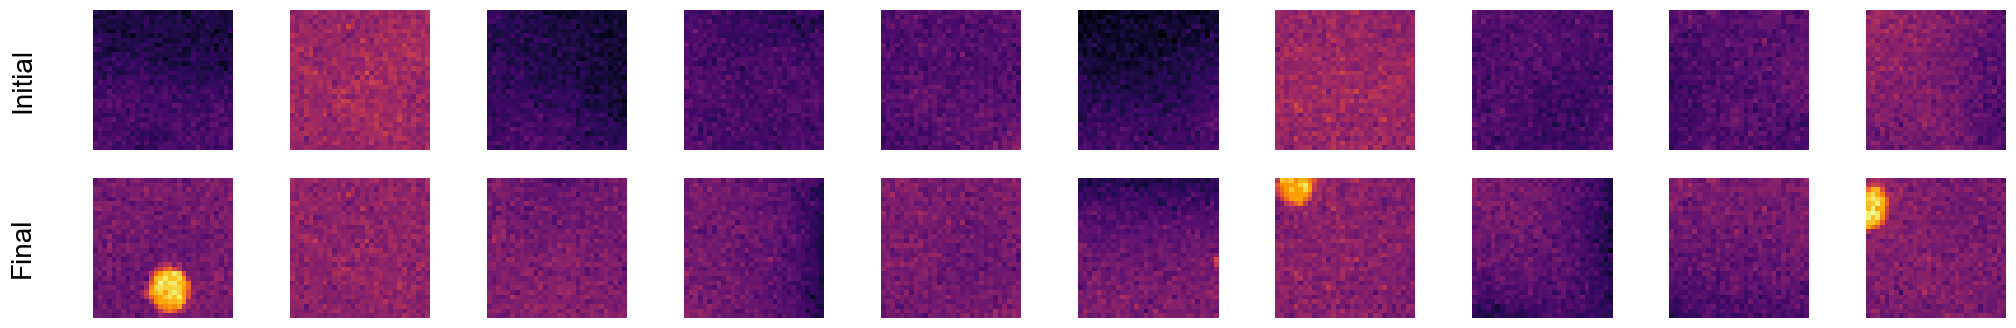

In [22]:

# find contrast setttings common to both initial and final
vmin = min(samples_initial.min(), samples_final.min())
vmax = max(samples_initial.max(), samples_final.max())

# plot samples from initial and final
fig, ax = plt.subplots(2, samples_final.shape[0], figsize=(2.5 * samples_final.shape[0], 4))
for i in range(samples_final.shape[0]):
    ax[0, i].imshow(samples_initial[i], vmin=vmin, vmax=vmax, cmap='inferno')
    ax[0, i].axis('off')
    ax[1, i].imshow(samples_final[i], vmin=vmin, vmax=vmax, cmap='inferno')
    ax[1, i].axis('off')

# add a label to the left of each row
ax[0, 0].text(-0.5, 0.5, 'Initial', fontsize=20, rotation=90, va='center', ha='center', transform=ax[0, 0].transAxes)
ax[1, 0].text(-0.5, 0.5, 'Final', fontsize=20, rotation=90, va='center', ha='center', transform=ax[1, 0].transAxes)

In [15]:
print(initial_patches.mean(), final_patches.mean())

339.720954647137 427.17767739951586
